In [17]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [26]:
hdf5_file = h5py.File('/home/oliverkn/pro/real_data_test/test.hdf5', "r")
data = hdf5_file['data'].value
hdf5_file.close()
print(data.shape)

(6974, 6)


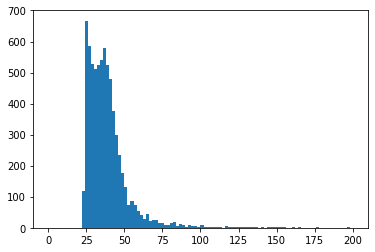

In [33]:
plt.hist(data[:,4], bins=100, range=(0,200))
plt.show()